In [102]:
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as pt
from tensorflow.keras.applications import DenseNet121

In [60]:
IMAGE_SIZE = 256
BATCH_SIZE = 180
CHANNELS = 3
EPOCHS = 20

In [61]:
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

) #processed dataset

Found 20638 files belonging to 15 classes.


In [62]:
class_names = dataset.class_names #names of classes of dataset
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [63]:
len(dataset)

115

In [64]:
for image_batch, label_batch in dataset.take(1): #defines the class of every image of first batch
    print(image_batch.shape)
    print(label_batch.numpy())

(180, 256, 256, 3)
[ 5 11  0  1 10 12  7  5  2  7  2  2  1 11 14 12  8  7 12  0 11 12 11  9
 10  9  9 14  1  7 12 11  6 12 12  1 14  9  2 14 10  1  2  5  7 13 11  0
 12  1 12  7  9  7 12 10  6  1  2  7  5 10  2 12 10  4 11  3  9  1  8  8
  7 13  2  2 11  6  5  3  8  5 10  1  5 10 14  2  7 12 10  1 11  0  0  5
 12  7 12  2  7  2 12 12  6 10  5  7  1 14  7 14  8  7  3  1  5  0  1 14
  0  9  5  8 11  9  5  2 14 10  1 10  3 12 10  4  8 12 12  2  5  1 11 10
  5 12 14  7 14 12  5  3  7  2 12  9  1  3  6 14  0 10  4  2 11 10  7  6
 11 12  6  7  1 10 10  9 12  9  2 12]


In [65]:
for image_batch, label_batch in dataset.take(1): #takes first batch
    print(image_batch[0])

tf.Tensor(
[[[136. 128. 141.]
  [142. 134. 147.]
  [126. 118. 131.]
  ...
  [ 89.  81.  92.]
  [ 99.  91. 102.]
  [ 98.  90. 101.]]

 [[132. 124. 137.]
  [132. 124. 137.]
  [118. 110. 123.]
  ...
  [ 86.  78.  89.]
  [ 96.  88.  99.]
  [ 92.  84.  95.]]

 [[152. 144. 157.]
  [139. 131. 144.]
  [121. 113. 126.]
  ...
  [102.  94. 105.]
  [113. 105. 116.]
  [106.  98. 109.]]

 ...

 [[201. 195. 205.]
  [198. 192. 202.]
  [195. 189. 199.]
  ...
  [188. 181. 188.]
  [191. 184. 191.]
  [189. 182. 189.]]

 [[202. 196. 206.]
  [199. 193. 203.]
  [196. 190. 200.]
  ...
  [193. 186. 193.]
  [192. 185. 192.]
  [188. 181. 188.]]

 [[196. 190. 200.]
  [194. 188. 198.]
  [193. 187. 197.]
  ...
  [196. 189. 196.]
  [194. 187. 194.]
  [187. 180. 187.]]], shape=(256, 256, 3), dtype=float32)


In [66]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())                     #convert the first batch of image to numpy

[[[131. 119. 119.]
  [ 98.  86.  86.]
  [109.  97.  97.]
  ...
  [101.  89.  89.]
  [104.  92.  92.]
  [ 83.  71.  71.]]

 [[120. 108. 108.]
  [102.  90.  90.]
  [118. 106. 106.]
  ...
  [121. 109. 109.]
  [124. 112. 112.]
  [ 89.  77.  77.]]

 [[107.  95.  95.]
  [107.  95.  95.]
  [121. 109. 109.]
  ...
  [106.  94.  94.]
  [116. 104. 104.]
  [101.  89.  89.]]

 ...

 [[176. 165. 171.]
  [183. 172. 178.]
  [183. 172. 178.]
  ...
  [171. 162. 165.]
  [180. 171. 174.]
  [167. 158. 161.]]

 [[136. 125. 131.]
  [158. 147. 153.]
  [180. 169. 175.]
  ...
  [171. 162. 165.]
  [191. 182. 185.]
  [179. 170. 173.]]

 [[152. 141. 147.]
  [168. 157. 163.]
  [169. 158. 164.]
  ...
  [179. 170. 173.]
  [150. 141. 144.]
  [176. 167. 170.]]]


In [67]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)                     #defines shape of image 

(256, 256, 3)


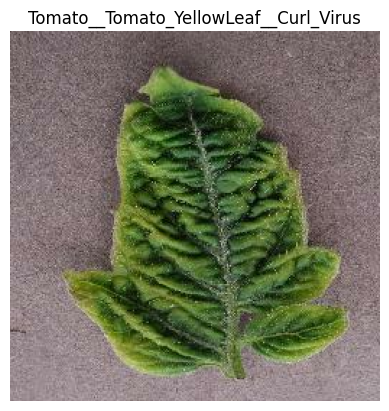

In [68]:
for image_batch, label_batch in dataset.take(1):
    pt.imshow(image_batch[0].numpy().astype("uint8"))       #Display image
    pt.title(class_names[label_batch[0]])                   #set title as class name
    pt.axis("off")

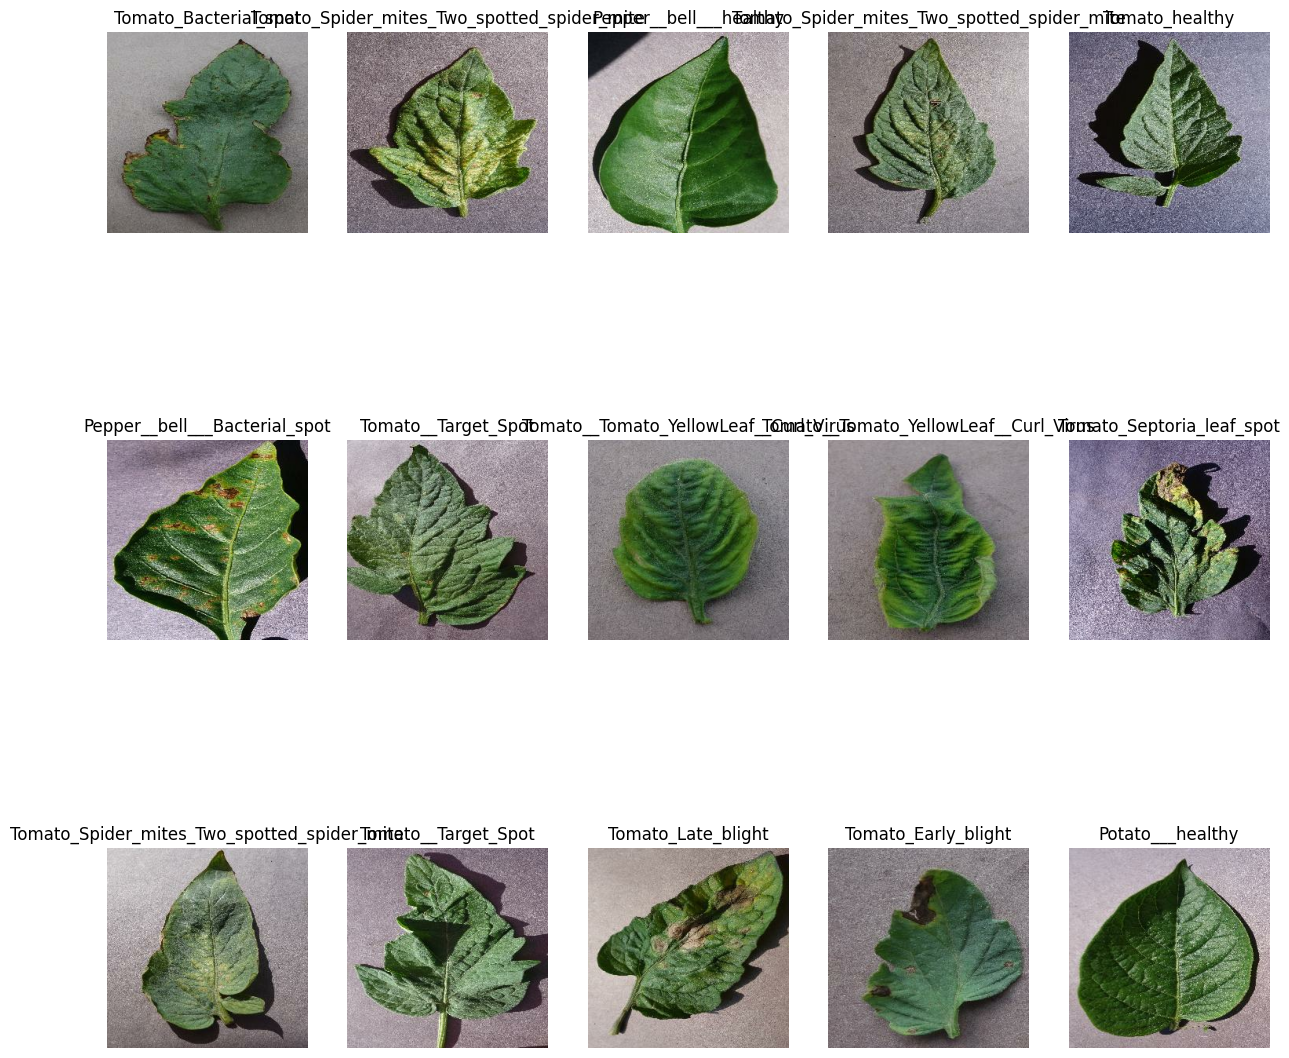

In [69]:
pt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = pt.subplot(3,5,i+1)
        pt.imshow(image_batch[i].numpy().astype("uint8"))
        pt.title(class_names[label_batch[i]])
        pt.axis("off")

In [70]:
train_size = 0.8
len(dataset)*train_size #splitting dataset 80 percent to train

92.0

In [71]:
train_ds = dataset.take(92)
len(train_ds)#training data

92

In [72]:
test_ds = dataset.skip(92)
len(test_ds)#testing data

23

In [73]:
val_size=0.1
len(dataset)*val_size#validation data 

11.5

In [74]:
val_ds = test_ds.take(11)
len(val_ds)

11

In [75]:
test_ds = test_ds.skip(11)
len(test_ds)

12

In [76]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [77]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [78]:
len(train_ds)

92

In [79]:
len(val_ds)

11

In [80]:
len(test_ds)

12

In [81]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE) #data is shuffled and also improves generalization
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [82]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.Rescaling(1.0/255)
])#preprocessing data resizing and rescaling

In [83]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])#preprocessing rotate images 20% for variations

In [107]:
#denseNet121 -  Highest Accuracy = 94%
n_classes = 15
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
base_model.trainable = False  # Freeze for transfer learning

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,  # Keep augmentation only for training
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

In [85]:
#custom Cnn=92%
"""
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_and_rescale,  
    data_augmentation,  # Ensure this is defined somewhere in your code

    # First Conv layer with input_shape (only in the first Conv2D layer)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),  # Convert 2D to 1D
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)#architecture of model
"""

"\ninput_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)\nn_classes = 15\n\nmodel = models.Sequential([\n    resize_and_rescale,  \n    data_augmentation,  # Ensure this is defined somewhere in your code\n\n    # First Conv layer with input_shape (only in the first Conv2D layer)\n    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(64, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Conv2D(128, (3, 3), activation='relu'),\n    layers.MaxPooling2D((2, 2)),\n\n    layers.Flatten(),  # Convert 2D to 1D\n    layers.Dense(128, activation='relu'),\n    layers.Dense(n_classes, activation='softmax'),\n])\nmodel.build(input_shape=input_shape)#architecture of model\n"

In [101]:
#Resnet- Lowest accuracy = 65%
"""
n_classes=15
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))
base_model.trainable = False

model = tf.keras.Sequential([
    resize_and_rescale,
    base_model,
    layers.GlobalMaxPooling2D(),
    layers.Dense(n_classes, activation='softmax')
])
"""

In [108]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 8, 8, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,170,639 (27.35 MB)

 Trainable params: 133,135 (520.06 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [109]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [110]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1224s 13s/step - accuracy: 0.4713 - loss: 1.8126 - val_accuracy: 0.8051 - val_loss: 0.6452
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1081s 12s/step - accuracy: 0.8292 - loss: 0.5815 - val_accuracy: 0.8662 - val_loss: 0.4478
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1140s 12s/step - accuracy: 0.8673 - loss: 0.4279 - val_accuracy: 0.8722 - val_loss: 0.3871
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1119s 12s/step - accuracy: 0.8921 - loss: 0.3485 - val_accuracy: 0.9061 - val_loss: 0.3067
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1113s 12s/step - accuracy: 0.9025 - loss: 0.3177 - val_accuracy: 0.8914 - val_loss: 0.3194
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1130s 12s/step - accuracy: 0.9151 - loss: 0.2799 - val_accuracy: 0.9040 - val_loss: 0.2865
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1200s 13s/step - accuracy: 0.9220 - loss: 0.2533 - val_accuracy: 0.9157 - val_loss: 0.2547
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 1084s 12s/step - accuracy: 0.9253 - loss: 0.2311 - val_accu

In [111]:
scores = model.evaluate(test_ds) #data tested

12/12 ━━━━━━━━━━━━━━━━━━━━ 293s 16s/step - accuracy: 0.9344 - loss: 0.1949


In [112]:
scores

[0.18029187619686127, 0.9407407641410828]

In [113]:
history

In [114]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [115]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 92}

In [116]:
history.history['accuracy']

[0.6373499631881714,
 0.8431931138038635,
 0.8741059303283691,
 0.8973208665847778,
 0.904533863067627,
 0.9192023277282715,
 0.9197478294372559,
 0.9252030253410339,
 0.9296884536743164,
 0.9302339553833008,
 0.9348405599594116,
 0.9390835165977478,
 0.9384773969650269,
 0.9393866062164307,
 0.9401745796203613,
 0.9435689449310303,
 0.9459328651428223,
 0.9466602206230164,
 0.9477512240409851,
 0.9518123269081116]

In [117]:
len(history.history['accuracy'])

20

In [118]:
acc=history.history['accuracy']
vali_acc=history.history['val_accuracy']
loss=history.history['loss']
vali_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

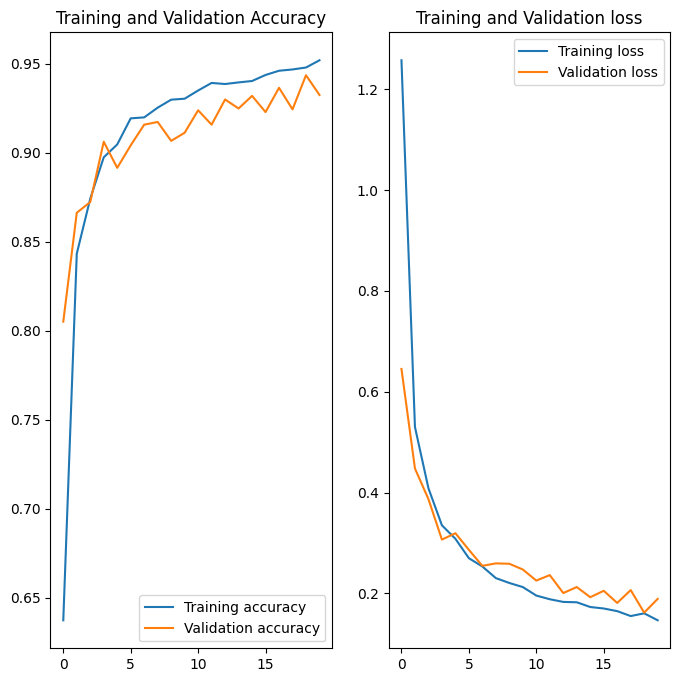

In [119]:
pt.figure(figsize=(8,8))
pt.subplot(1,2,1)
pt.plot(range(EPOCHS), acc, label='Training accuracy')
pt.plot(range(EPOCHS), vali_acc, label='Validation accuracy')
pt.legend(loc='lower right')
pt.title('Training and Validation Accuracy')

pt.subplot(1,2,2)
pt.plot(range(EPOCHS), loss, label='Training loss')
pt.plot(range(EPOCHS), vali_loss, label='Validation loss')
pt.legend(loc='upper right')
pt.title('Training and Validation loss')

In [120]:
import numpy as np

first image to predict
actual label:  Tomato_Early_blight
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step
predicted label: Pepper__bell___Bacterial_spot


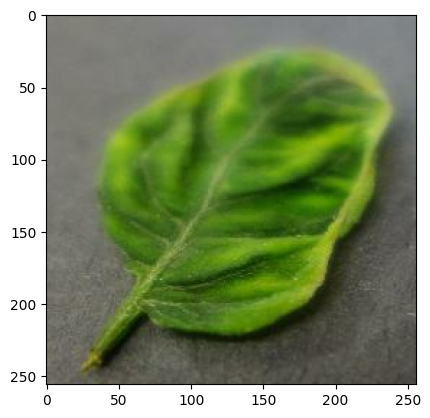

In [121]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[3].numpy().astype('uint8')
    first_label= labels_batch [0].numpy()

    print("first image to predict")
    pt.imshow(first_image)

    print("actual label: ",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [122]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions=model.predict(img_array)

    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


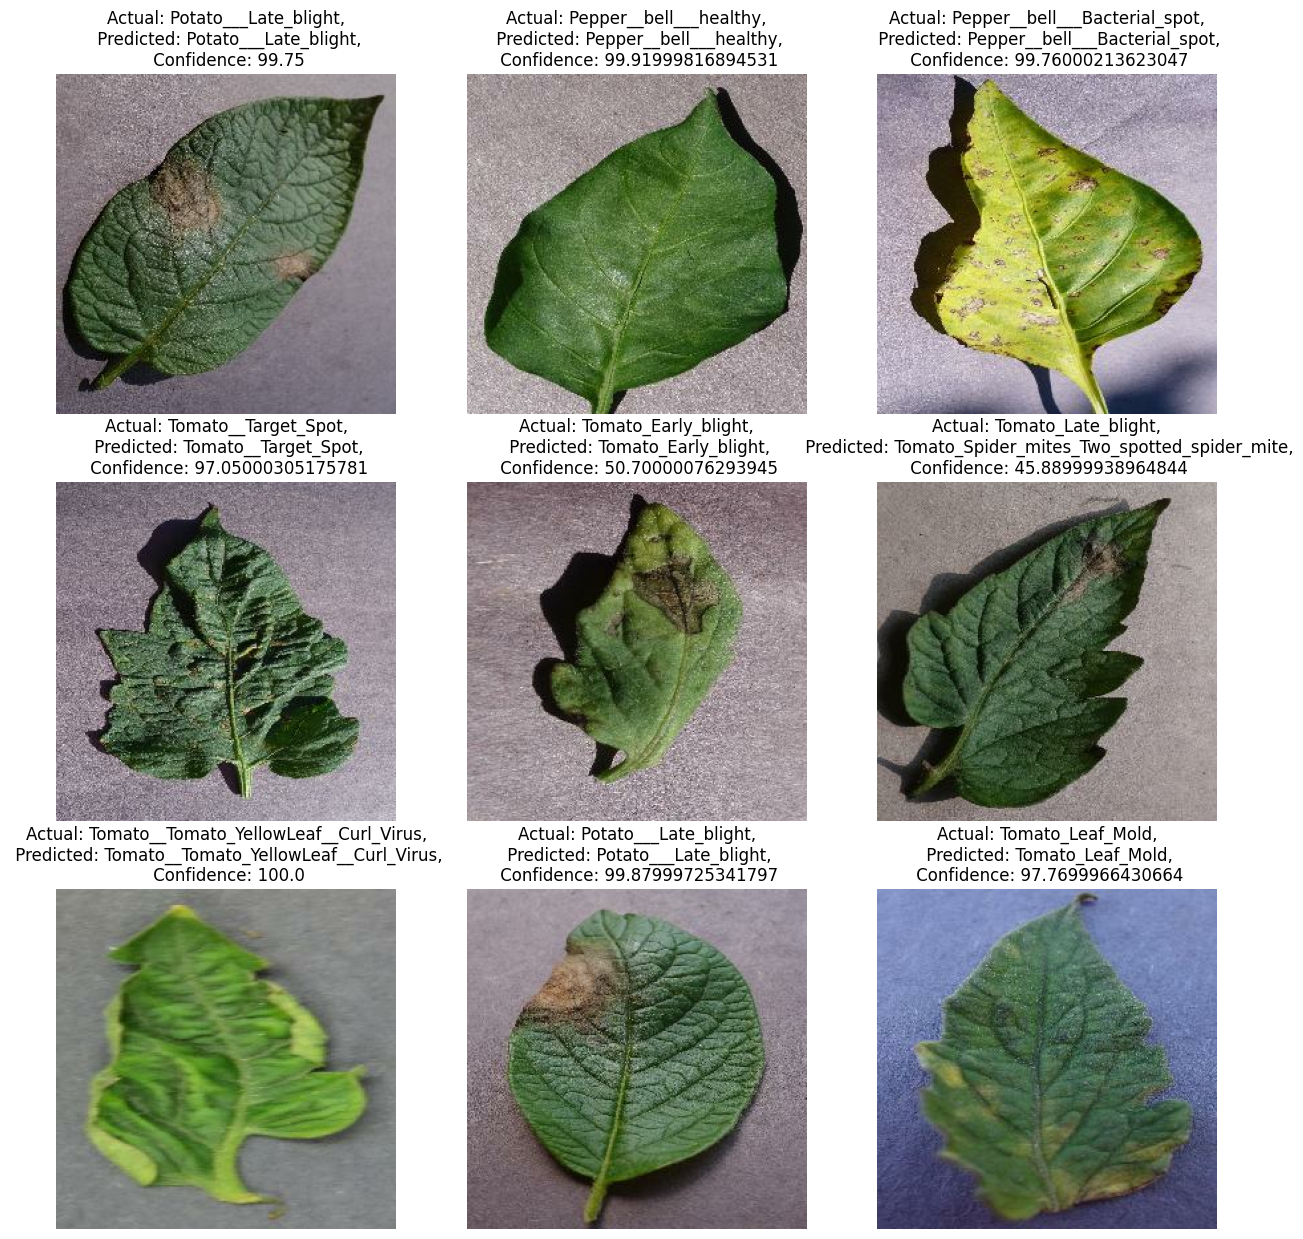

In [123]:
pt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

    for i in range(9) :

        ax = pt.subplot(3, 3, i+1)
        pt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        pt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")

        pt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

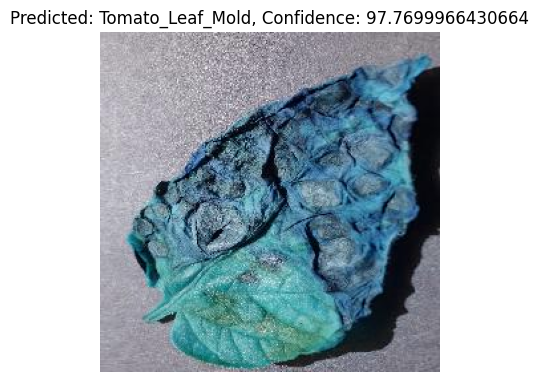

In [124]:
import matplotlib.pyplot as plt
import cv2  
your_image_path = r"C:\Users\yashp\PlantVillage\Potato___Early_blight\0e6b9e09-2bcd-41e0-b001-b80a33a8a78b___RS_Early.B 8694.JPG"
your_image = cv2.imread(your_image_path)
predicted_class, confidence = predict(model, your_image)  
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.imshow(your_image)
plt.title(f"Predicted: {predicted_class}, Confidence: {confidence}")
plt.axis("off")